In [1]:
import numpy as np # linear algebra
import pandas as pd
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv("/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [5]:
df.shape

(270, 14)

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.describe(exclude=None)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
num_var=df.iloc[:,0:13]

In [9]:
num_var

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [10]:
df.describe(include='object')

,Heart Disease
count,270
unique,2
top,Absence
freq,150


In [11]:
cat_var=df.iloc[:,-1]

In [12]:
cat_var

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

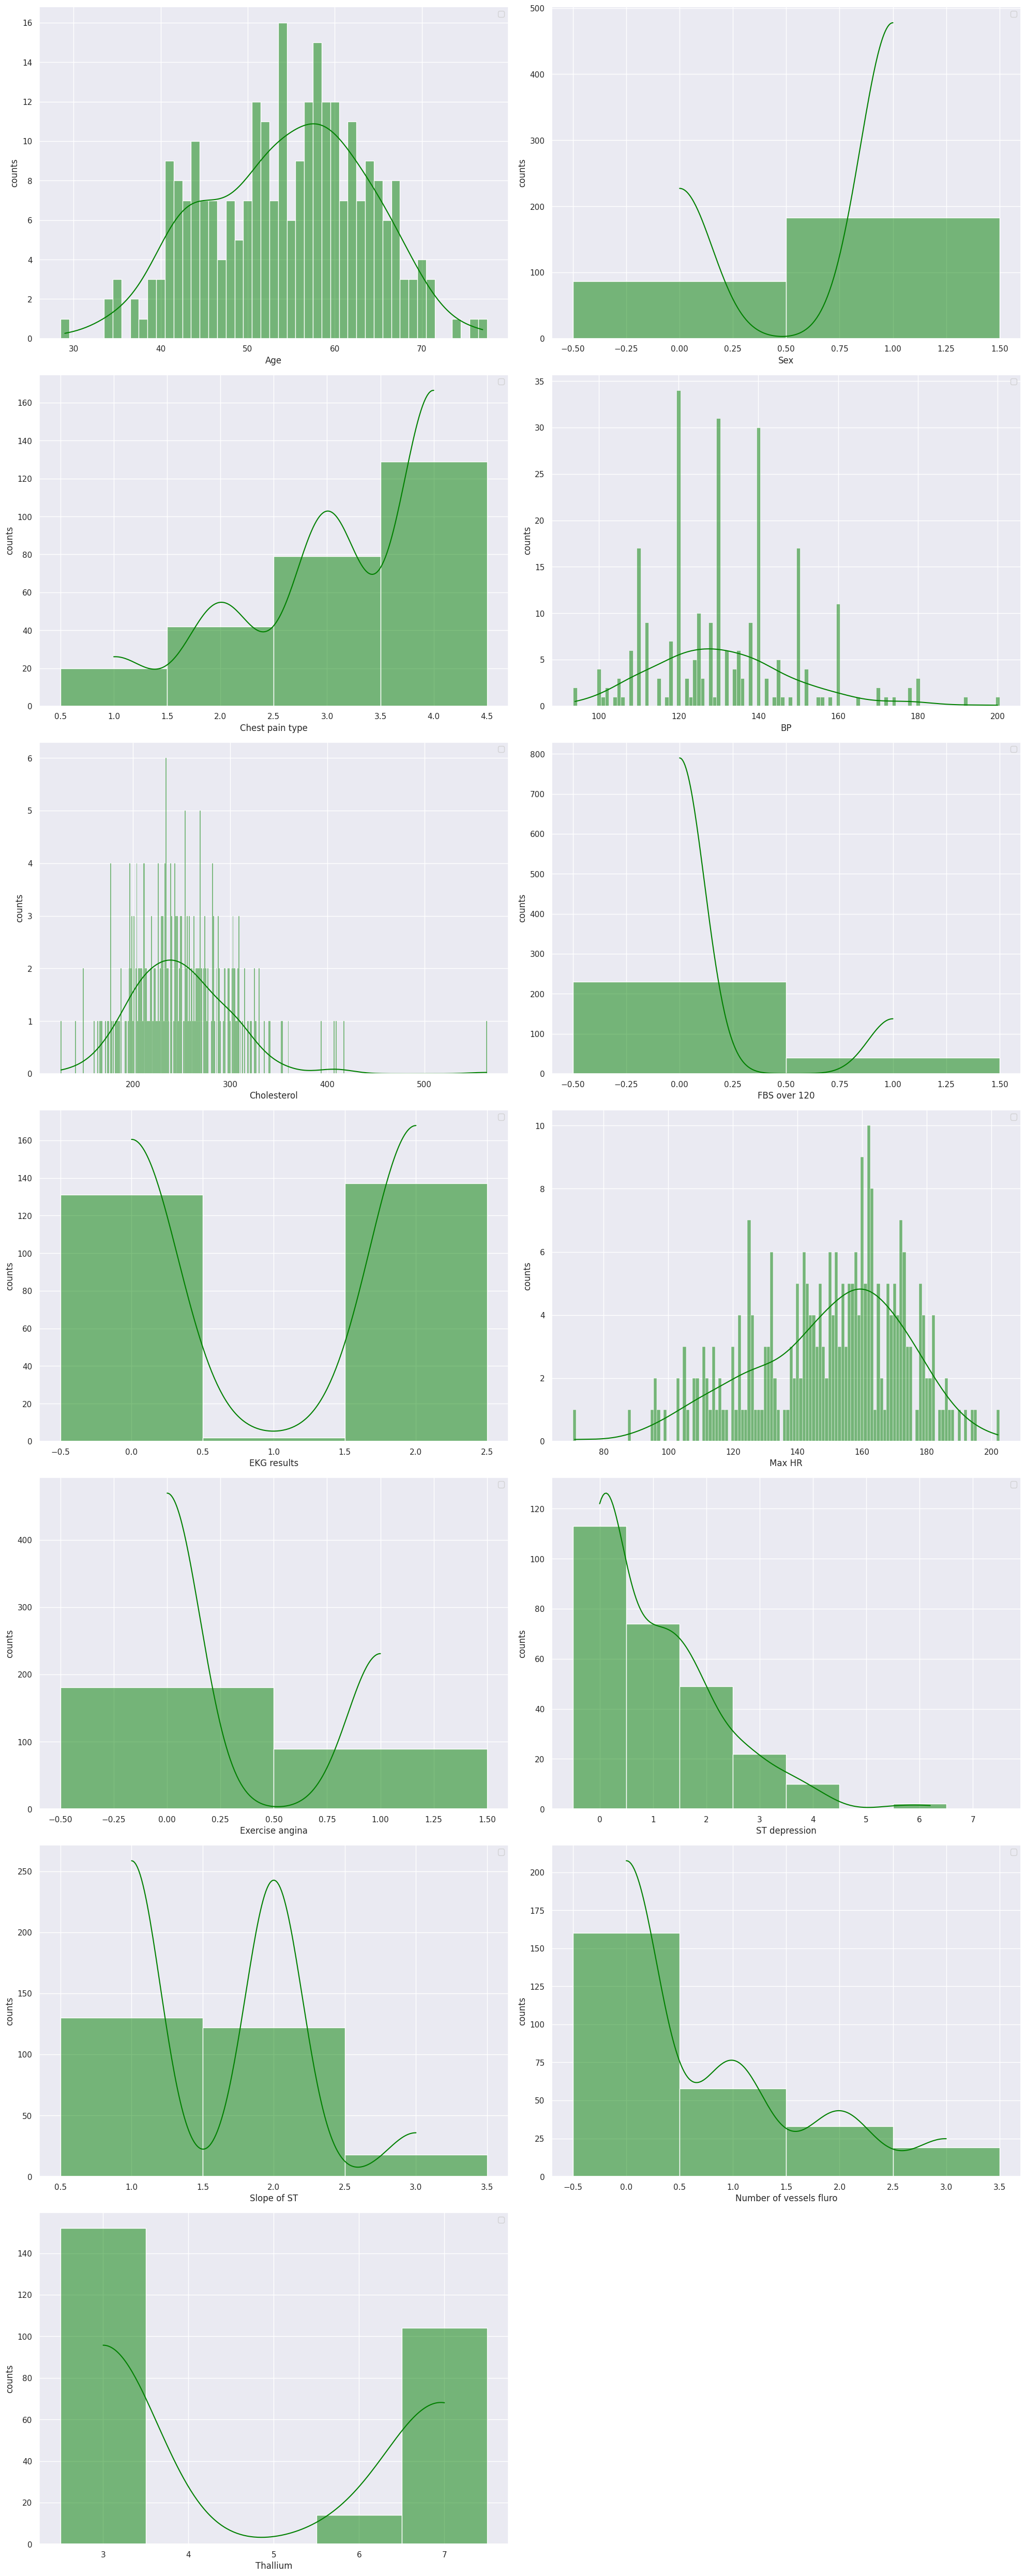

In [13]:
sns.set_theme(style="darkgrid",color_codes=True)
plt.figure(figsize=(20,50))
plotnumber=1
for col in num_var:
    if plotnumber<=13:
        ax=plt.subplot(7,2,plotnumber)
        sns.histplot(x=num_var[col],bins = 10,discrete = True,kde = True,color='green')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.legend()
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Heart Disease', ylabel='count'>

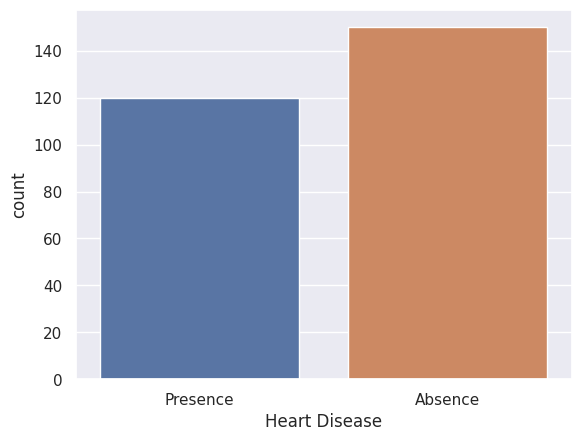

In [14]:
sns.countplot(x='Heart Disease' ,data=df)

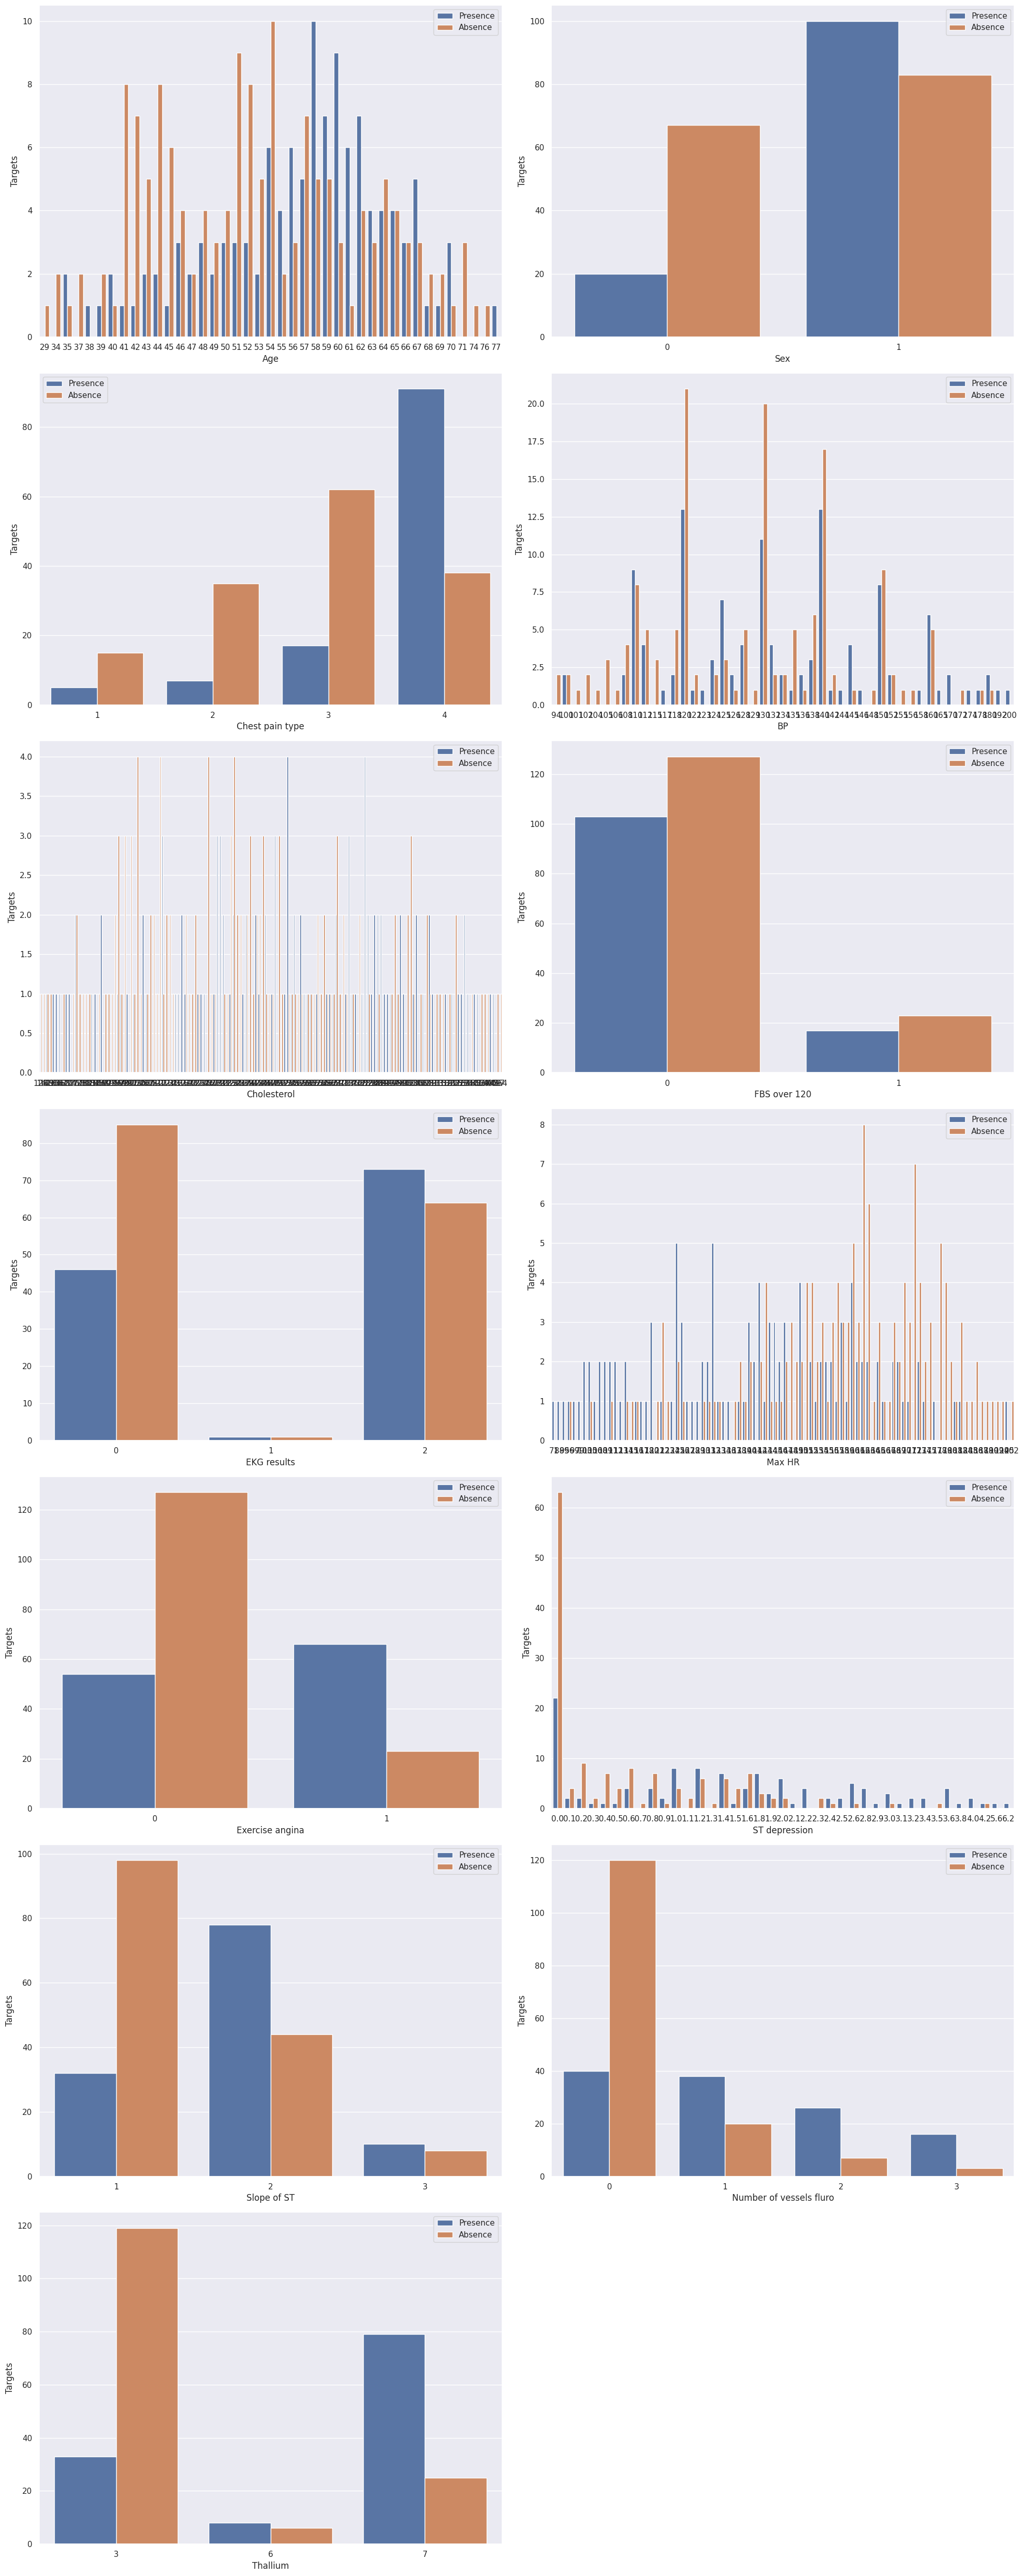

In [15]:
plt.figure(figsize=(20,50))
plotnumber=1
for col in df:
    if plotnumber<=13:
        ax=plt.subplot(7,2,plotnumber)
        sns.countplot(x=df[col],hue=df['Heart Disease'])
        plt.xlabel(col)
        plt.ylabel('Targets')
        plt.legend()
    plotnumber+=1
plt.tight_layout() 

<Figure size 2000x5000 with 0 Axes>

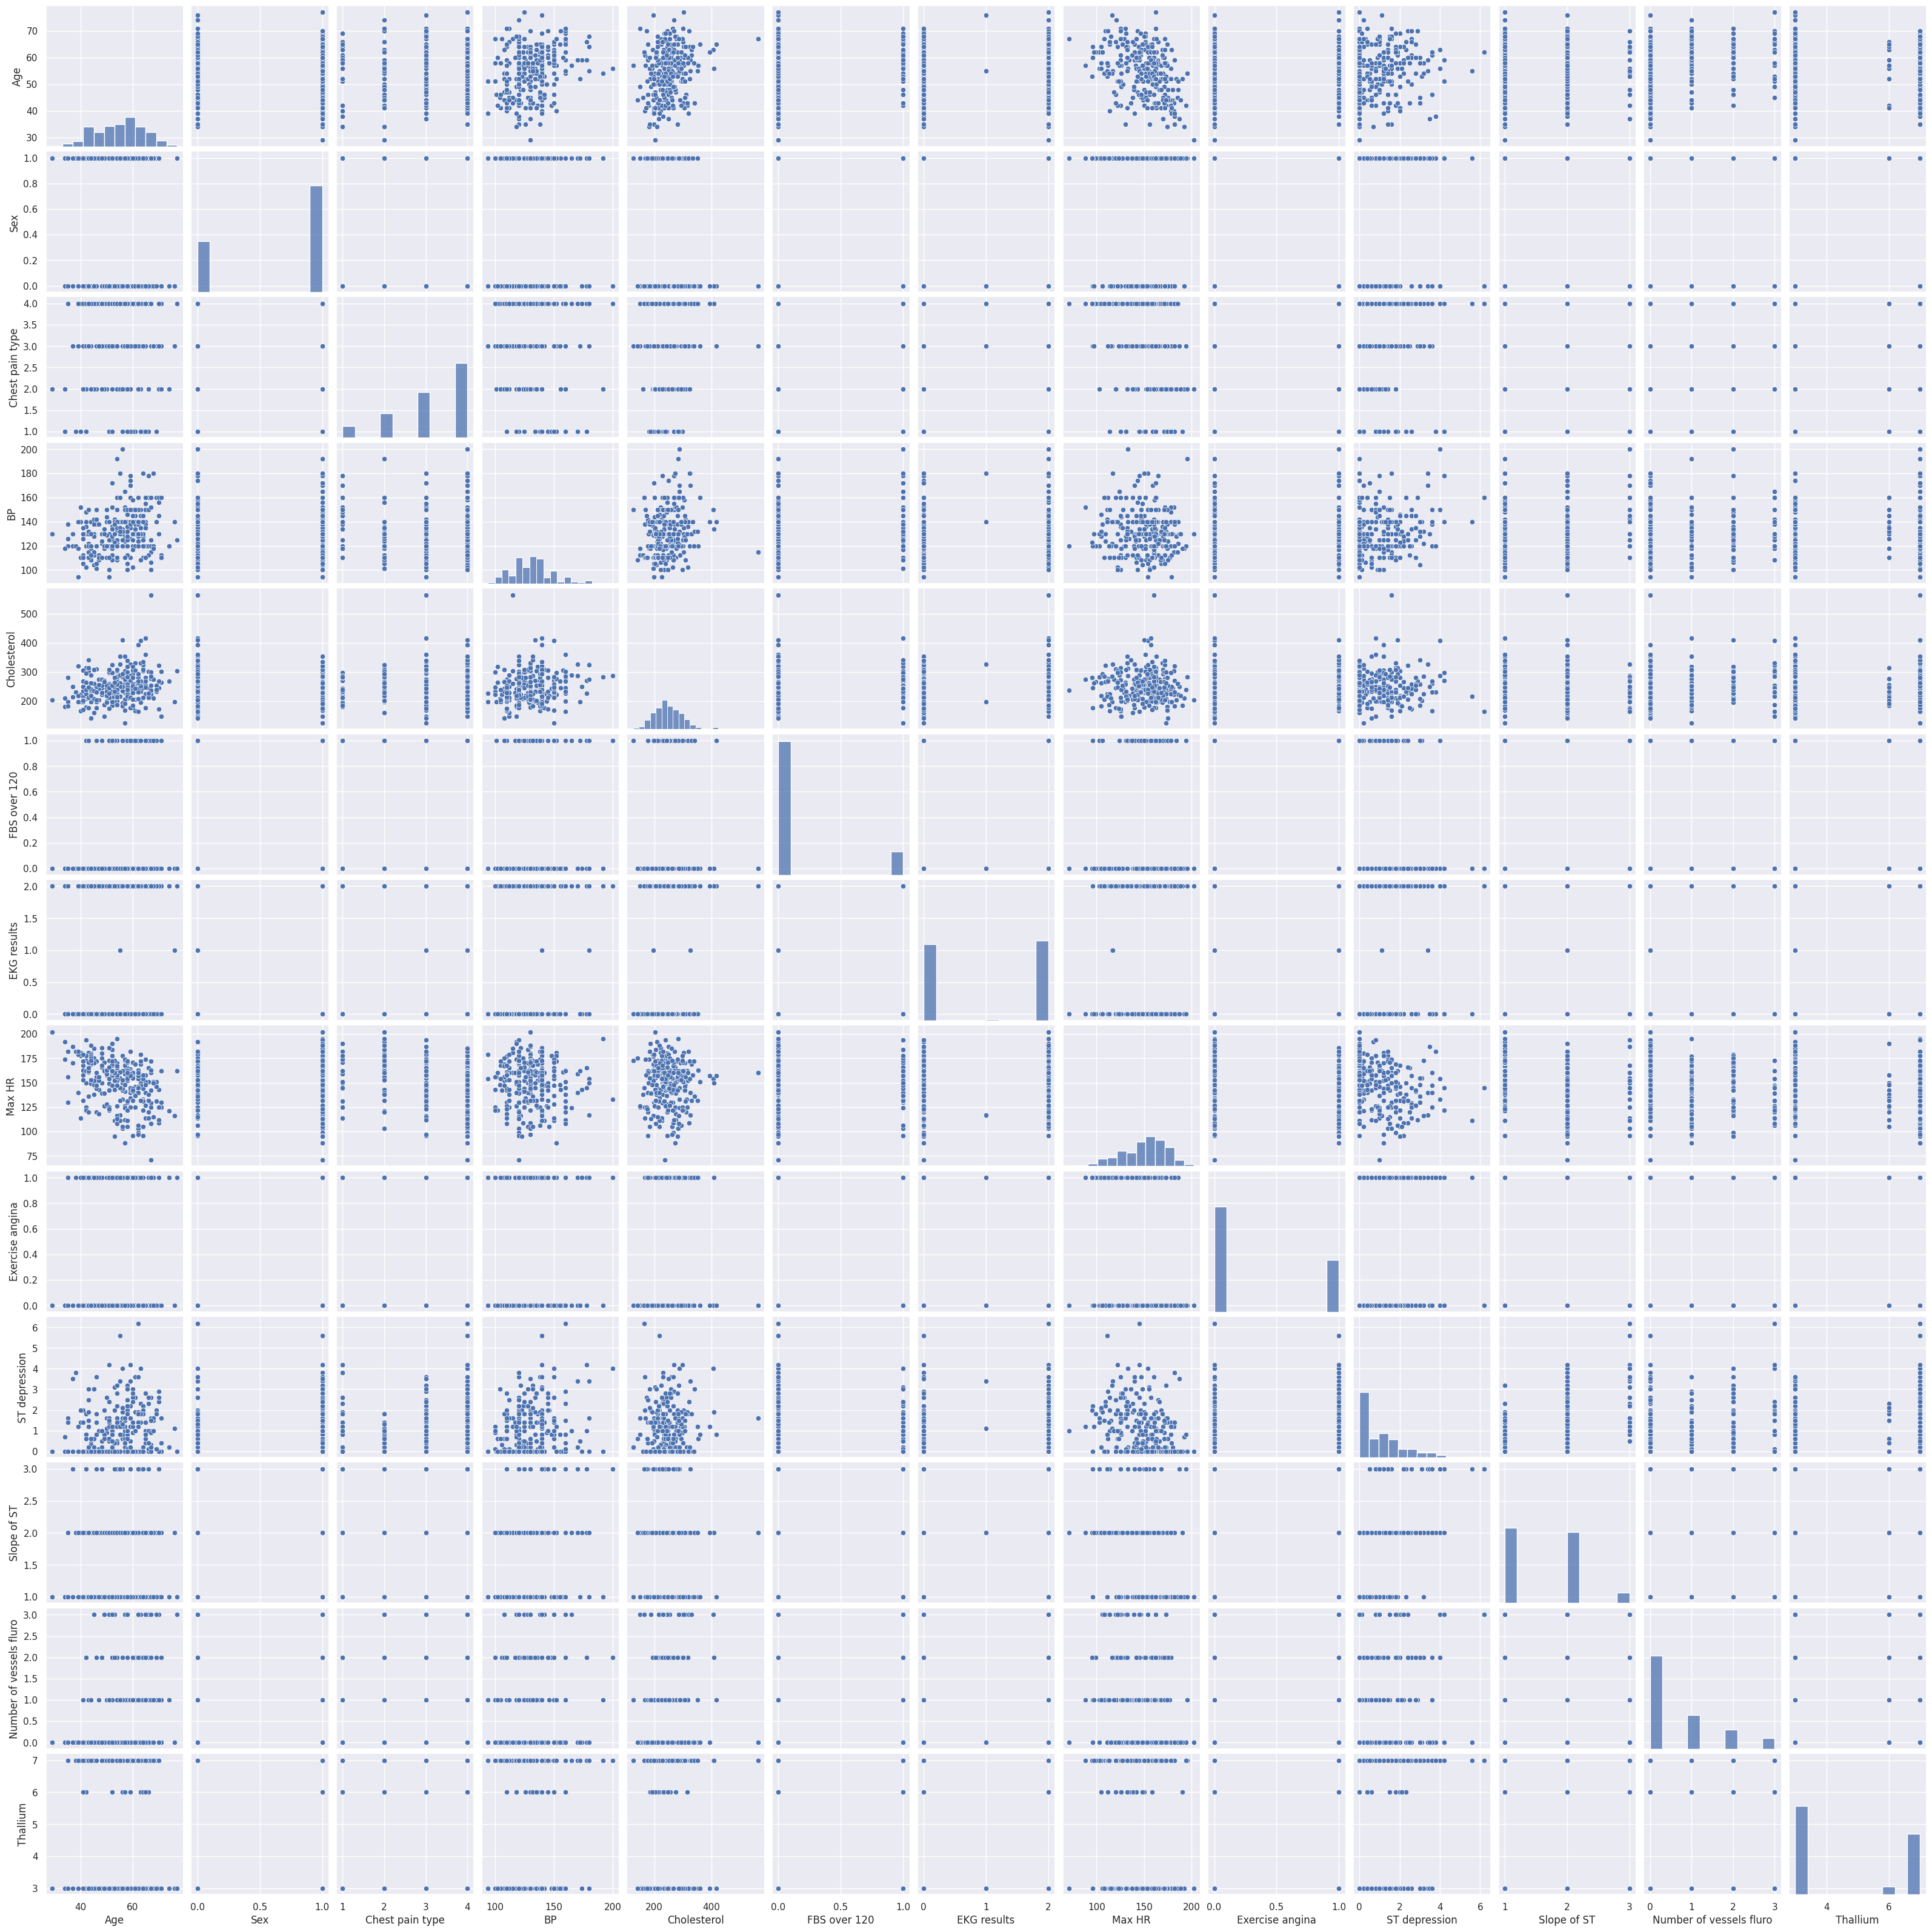

In [16]:
plt.figure(figsize=(20,50))
sns.pairplot(df)
plt.show()

In [17]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
x=df.iloc[:,0:13]
Y=df['Heart Disease']

In [20]:
Label_Encoder=LabelEncoder()
y=Label_Encoder.fit_transform(Y)
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [21]:
train_tar=pd.DataFrame(y)
train_tar

,0
0,1
1,0
2,1
3,0
4,0
...,...
265,0
266,0
267,0
268,0


In [22]:
stand_scaler=StandardScaler()
X=stand_scaler.fit_transform(x)
X

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.67641928,
        -0.71153494,  1.18927733],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.18927733],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494,  0.67303154],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581]])

In [23]:
train_fur=pd.DataFrame(X)
train_fur

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.183559,2.280369,-0.981951,2.397916,-1.026285,0.532904,-0.701222,-0.481153,-0.954234,-0.711535,1.189277
266,-1.147506,0.689500,-1.238045,-0.636310,0.258589,-0.417029,-1.026285,1.008625,-0.701222,-0.918565,-0.954234,-0.711535,1.189277
267,0.172309,-1.450327,-1.238045,0.485490,0.859476,-0.417029,0.981664,0.143677,-0.701222,0.218706,0.676419,-0.711535,-0.875706
268,0.282294,0.689500,0.870928,0.485490,-1.117635,-0.417029,-1.026285,-0.072560,-0.701222,-0.568636,0.676419,-0.711535,0.673032


In [24]:
df_crr=train_fur.corr()
df_crr

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
1,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
2,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
3,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
4,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
5,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
6,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
7,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
8,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
9,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


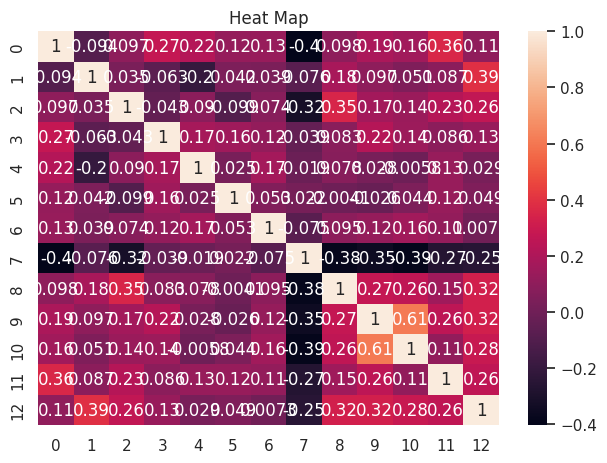

In [25]:
plt.figsize=(20,50)
sns.heatmap(df_crr,annot=True)
plt.title("Heat Map")
plt.tight_layout()

In [26]:
X_train, X_test, y_train, y_test=train_test_split(train_fur, train_tar, test_size=0.33, random_state=42)

In [27]:
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred=lr_model.predict(X_test)
lr_accur=accuracy_score(y_test,lr_pred)
lr_accur

0.7888888888888889

In [28]:
svc_model=SVC()
svc_model.fit(X_train,y_train)
svc_pred=svc_model.predict(X_test)
svc_accur=accuracy_score(y_test,svc_pred)
svc_accur

0.8222222222222222

In [29]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred=knn_model.predict(X_test)
knn_accur=accuracy_score(y_test, knn_pred)
knn_accur

0.8111111111111111

In [30]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred=dt_model.predict(X_test)
dTaccur=accuracy_score(y_test, dt_pred)
dTaccur

0.7666666666666667

In [31]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred=rf_model.predict(X_test)
rf_accur=accuracy_score(y_test, rf_pred)
rf_accur

0.8